If you're here from my website, the source code for the referenced integral is below. There are also other simulations for integrals over the unitary group as well. 

In [ ]:
#The following code implements the metropolis hastings algorithm to compute two some integrals over the unitary group

In [ ]:
import numpy as np
pi = np.pi

In [ ]:
#construct a unitary matrix from the parametrization given in https://arxiv.org/pdf/1103.3408.pdf
def construct_unitary(theta):
  U1 = [[1,0],[0,complex(np.cos(theta[2]),np.sin(theta[2]) )]]
  U2 = [ [np.cos(theta[1]), np.sin(theta[1])], [ -np.sin(theta[1]),np.cos(theta[1])] ] 
  U3 = [[complex(np.cos(theta[0]),np.sin(theta[0]) ),0], [0,1]]
  U4 = [[1,0],[0,complex(np.cos(theta[3]),np.sin(theta[3]) )]]
  U = np.matmul(U1,U2)
  V = np.matmul(U3,U4)
  return np.matmul(U,V)

MCMC approximation of $\int|\psi\rangle\langle\psi|d\psi =\int U|0\rangle\langle0|UdU $. This integral should be equal to the maximally mixed state on $\text{D}(\mathbb{C}^2)$.


In [ ]:
#returns error for the first integral
def compute_error_mcmc_integral_approximation(iterations):
  lambdas = []
  initial_lambda = [np.random.uniform(0,2*pi),np.random.uniform(0,pi/2), np.random.uniform(0,2*pi), np.random.uniform(0,2*pi)]
  lambdas.append(initial_lambda)

  for N in range(iterations):
    w = [np.random.uniform(0,2*pi),np.random.uniform(0,pi/2), np.random.uniform(0,2*pi), np.random.uniform(0,2*pi)]
    alpha = a(lambdas[N][1],w[1])
    flip = coin(alpha)
    if flip ==1:
      lambdas.append(w)
    else:
      lambdas.append(lambdas[N])

  burn_in = int(iterations/5)
  sample = lambdas[burn_in:]
  K = len(sample)

  unitary_sample = []
  for L in sample:
    unitary_sample.append(construct_unitary(L))

  avg = [[0,0],[0,0]]
  proj0 = [[1,0],[0,0]]

  for U in unitary_sample:
    avg = avg + np.matmul(np.matmul(U,proj0),np.transpose(np.conjugate(U)))
  avg = (1/K)*avg

  dif = [[.5,0],[0,.5]]-avg
  error = np.sqrt(np.trace( np.matmul(np.transpose(np.conjugate(dif)),dif) ))

  return np.real(error)
 

In [ ]:
iters = range(1,10000)
errors = [compute_error_mcmc_integral_approximation(iter) for iter in iters]

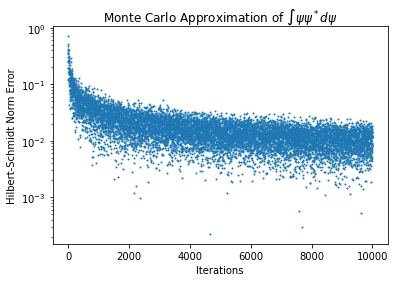

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(iters,errors,s=1)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Hilbert-Schmidt Norm Error')
plt.title(r'Monte Carlo Approximation of $\int \psi\psi^*d\psi$')
plt.show()

Now consider the integral $ \int U\otimes U^* dU$. The theoretical result of this integral is 1/2 times the swap operator on two qubits. 

In [ ]:
def compute_error_mcmc_integral2_approximation(iterations):
  lambdas = []
  initial_lambda = [np.random.uniform(0,2*pi),np.random.uniform(0,pi/2), np.random.uniform(0,2*pi), np.random.uniform(0,2*pi)]
  lambdas.append(initial_lambda)

  for N in range(iterations):
    w = [np.random.uniform(0,2*pi),np.random.uniform(0,pi/2), np.random.uniform(0,2*pi), np.random.uniform(0,2*pi)]
    alpha = a(lambdas[N][1],w[1])
    flip = coin(alpha)
    if flip ==1:
      lambdas.append(w)
    else:
      lambdas.append(lambdas[N])

  burn_in = int(iterations/5)
  sample = lambdas[burn_in:]
  K = len(sample)

  unitary_sample = []
  for L in sample:
    unitary_sample.append(construct_unitary(L))

  avg = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
  proj0 = [[1,0],[0,0]]

  for U in unitary_sample:
    avg = avg + np.kron(U,np.transpose(np.conjugate(U)))
  avg = (1/K)*avg

  F = [[.5,0,0,0],
       [0,0,.5,0],
       [0,.5,0,0],
       [0,0,0,.5]]

  dif = F-avg
  error = np.sqrt(np.trace( np.matmul(np.transpose(np.conjugate(dif)),dif) ))

  return np.real(error)

In [ ]:
compute_error_mcmc_integral2_approximation(10000)

0.0006293282853734898

In [ ]:
iters = range(1,5000)
errors = [compute_error_mcmc_integral2_approximation(iter) for iter in iters]

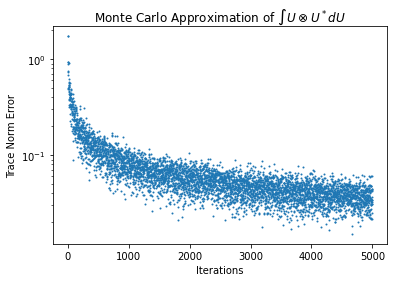

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(iters,errors,s=1)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Trace Norm Error')
plt.title(r'Monte Carlo Approximation of $\int U\otimes U^*dU$')
plt.show()

Here we approximate the integral $\int_{\mathbb{U}(2)}\text{Tr}^2(U)dU$.  

In [ ]:
def compute_error_mcmc_integral3_approximation(iterations):
  lambdas = []
  initial_lambda = [np.random.uniform(0,2*pi),np.random.uniform(0,pi/2), np.random.uniform(0,2*pi), np.random.uniform(0,2*pi)]
  lambdas.append(initial_lambda)

  for N in range(iterations):
    w = [np.random.uniform(0,2*pi),np.random.uniform(0,pi/2), np.random.uniform(0,2*pi), np.random.uniform(0,2*pi)]
    alpha = a(lambdas[N][1],w[1])
    flip = coin(alpha)
    if flip ==1:
      lambdas.append(w)
    else:
      lambdas.append(lambdas[N])

  burn_in = int(iterations/5)
  sample = lambdas[burn_in:]
  K = len(sample)

  unitary_sample = []
  for L in sample:
    unitary_sample.append(construct_unitary(L))

  avg = 0

  for U in unitary_sample:
    avg =avg + np.abs(np.trace(U))**2
  avg = (1/K)*avg

  theoretical = 1

  error = np.abs(theoretical-avg)

  return error

In [ ]:
compute_error_mcmc_integral3_approximation(10000000)

0.0009787474498271775

In [ ]:
iters = range(1,5000)
errors = [compute_error_mcmc_integral3_approximation(iter) for iter in iters]

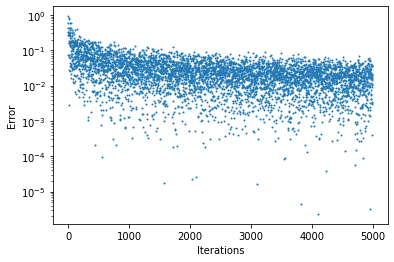

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(iters,errors,s=1)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()